In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing  #用来做数据标准化
from sklearn.metrics import classification_report  #评估模型用于正确率，召回率和F1值
scale = True #是否启动数据标准化→数据标准化：x为特征数据，u为数据的mean，s为数据的方差
             #newvalue = （oldvalue-u）/s

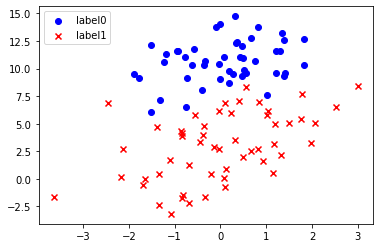

In [24]:
data = np.genfromtxt('C:\\Users\\Administrator\\python课程资料\\机器学习\\程序\\回归\\LR-testSet.csv',delimiter=',')
x_data = data[:,:-1]  #x_data为样本
y_data = data[:,-1]  #y_data为标签

def plot():
    x0 = []  #x0代表0类别x的值
    x1 = []  #x1代表1类别x的值
    y0 = []  #y0代表0类别y的值
    y1 = []  #y1代表1类别y的值
    #切分不同类别的数据
    for i in range(len(data)):
        if y_data[i]==0:  
            x0.append(x_data[i,0])  #如果y值=0，x_data的2个参数会作为x0，y0出现
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])  #如果y值=1，x_data的2个参数会作为x1，y1出现
            y1.append(x_data[i,1])
    #分别依据y值=0的样本x0，y0画出对应的·
    #分别依据y值=1的样本x1，y1画出对应的×
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    
    #贴上标签
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
plot()  #命令电脑画什么
plt.show()  #显示制图

In [25]:
print(x_data[0:3])

[[-0.017612 14.053064]
 [-1.395634  4.662541]
 [-0.752157  6.53862 ]]


In [26]:
print(y_data[0:3])

[0. 1. 0.]


In [27]:
x0 = []
x0.append(x_data[0,0])
x0

[-0.017612]

In [28]:
#数据的再处理，添加偏置值100行1列全是1的矩阵
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)

X_data = np.concatenate((np.ones((len(x_data),1)),x_data),axis=1)
print(X_data.shape)

(100, 2)
(100, 1)
(100, 3)


In [29]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))

def gradAscent(xArr, yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costList = []
    # 计算数据行列数
    # 行代表数据个数，列代表权值个数
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):             
        # xMat和weights矩阵相乘
        h = sigmoid(xMat*ws)   
        # 计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad 
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [30]:
ws,costList = gradAscent(X_data,y_data)
print(ws)

[[ 1.        ]
 [ 0.30816757]
 [-1.76171512]]


In [31]:
if scale == False:
    # 画图决策边界
    plot()
    x_test = [[-4],[3]]
    y_test = (-ws[0] - x_test*ws[1])/ws[2]
    plt.plot(x_test, y_test, 'k')
    plt.show()

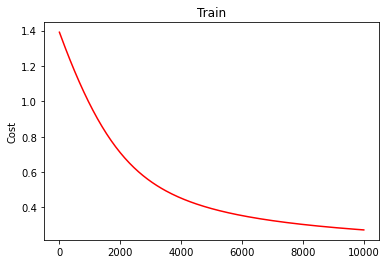

In [32]:
#画图loss值的变化
x = np.linspace(0,10000,201)  #201是10000次迭代输出50，+1=200+1=201
plt.plot(x,costList,c='r')
plt.title('Train')
plt.ylabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [33]:
# 预测
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    #≥0.5返回1，否则返回0
    #x是sigmoid（xMat*ws）的每一个值
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(X_data, ws)
#sklearn中自带计算准确率和召回率的命令
print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        47
         1.0       1.00      0.92      0.96        53

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [36]:
np.e  #np.e代表自然常数

2.718281828459045

In [37]:
np.exp(2)  #np.exp(2)中xp（2）代表次方为（2）

7.38905609893065

In [38]:
(np.e)**2

7.3890560989306495

In [39]:
a = [1,2,3]
np.shape(a)

(3,)